In [53]:
import datamol as dm
import pandas as pd
import numpy as np
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import random

In [17]:
data_cnr2 = pd.read_csv("chembl253_final.csv")
data_cnr2 = data_cnr2.iloc[::, 1::]

In [18]:
data_cnr2.describe()

,value
count,3443.000000
mean,24.922043
std,26.910261
min,-0.660000
25%,4.000000
50%,14.000000
75%,39.000000
max,100.000000


In [19]:
data_cnr2.head()

,id,smiles,value_type,value,units
0,CHEMBL596626,Cc1nc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(Cl)n1-c1ccccc1,EC50,63.100,nM
1,CHEMBL597438,CCCCc1c(C(=O)NC23CC4CC(CC(C4)C2)C3)nc(C)n1-c1c...,EC50,5.012,nM
2,CHEMBL604120,CCc1nc(C(=O)NC23CC4CC(CC(C4)C2)C3)cn1-c1ccccc1,EC50,12.590,nM
3,CHEMBL2348469,CC1(C)Oc2cc(C34CC5CC(CC(C5)C3)C4)cc(O)c2[C@@H]...,Ki,7.800,nM
4,CHEMBL597084,Cc1nc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(C)n1C1CCCCC1,Ki,20.000,nM


In [37]:
# min_ki_idx = data_cnr2['value'].idxmin()
# max_ki_idx = data_cnr2['value'].idxmax()
# min_max_idx = [min_ki_idx, max_ki_idx]
# remaining_idx = data_cnr2.index.difference(min_max_idx)
# random.seed(42)
# random_rows=random.sample(range(1, 4776), 498) 
# rows = list(min_max_idx) + list(random_rows)
# rows_set = {*rows}
# len(rows_set)
# data_cnr2 = data_cnr2.iloc[rows]

In [20]:
# mols_cnr2 = data_cnr2['smiles'].tolist()
reference_mols_cnr2 = ['CC1=C(N(N=C1C(=O)NC23CC4CC(C2)CC(C4)C3)CCCCCO)C5=CC=CC=C5', 
                       'CC1([C@@H]2CC[C@H](C[C@H]2C3=C(C=C(C=C3O1)C(C)(C)CCCCCC#N)O)CO)C', 
                       'CC1=C(C2=C3N1[C@@H](COC3=CC=C2)CN4CCOCC4)C(=O)C5=CC=CC6=CC=CC=C65', 
                       'CCCCCCC(C)(C)C1=CC(=C(C(=C1)OC)[C@H]2C=C([C@H]3C[C@@H]2C3(C)C)CO)OC', 
                       'CCCCCCC(C)(C)C1=CC(=C(C=C1)[C@@H]2C[C@@H](CC[C@H]2CCCO)O)O', 
                       'CC(C)CN1C(=O)CN(C1=O)CC2=CC=C(C=C2)C3=NC(=C(C=C3)F)CNC4CCOCC4', 
                       'CC(C)(C)[C@@H](CO)NC(=O)C1=NN(C2=C1C[C@H]3[C@@H]2C3)C4=NC=C[N+](=C4)[O-]']
reference_receptors_cnr2 = ['5ZTY', '6KPF', '6PT0', '8GUS', '8GUR', '8GUT', '8GUQ']

In [21]:
def calculate_tanimoto_similarity(input_smiles, reference_mols_list, reference_receptors_list):
    tanimoto_distance = dm.similarity.cdist(input_smiles, reference_mols_list, distances_chunk=False)
    tanimoto_similarity = 1 - tanimoto_distance
    calculated_df = pd.DataFrame(data=tanimoto_similarity, columns=reference_receptors_list)
    return calculated_df

In [22]:
data = calculate_tanimoto_similarity(data_cnr2['smiles'].tolist(), reference_mols_cnr2, reference_receptors_cnr2)

/home/matikmate/miniconda3/envs/ml/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
data.describe()

,5ZTY,6KPF,6PT0,8GUS,8GUR,8GUT,8GUQ
count,3443.000000,3443.000000,3443.000000,3443.000000,3443.000000,3443.000000,3443.000000
mean,0.123567,0.097775,0.109146,0.098303,0.107837,0.105015,0.103339
std,0.056273,0.064629,0.048686,0.055458,0.051370,0.039478,0.053482
min,0.048000,0.025424,0.036496,0.025641,0.036496,0.039370,0.036496
25%,0.093525,0.066667,0.083333,0.070175,0.080882,0.083916,0.081081
50%,0.110294,0.082707,0.099237,0.088710,0.099174,0.101562,0.097403
75%,0.129771,0.102564,0.119403,0.111111,0.123077,0.118056,0.114754
max,1.000000,0.960526,1.000000,1.000000,1.000000,0.639175,1.000000


In [24]:
max_tanimoto_values = data.iloc[:, 0:].max(axis=1)

In [25]:
max_tanimoto_columns = data.iloc[:, 0:].idxmax(axis=1)

(array([ 24.,  36.,  93., 164., 309., 466., 435., 312., 267., 192., 141.,
         96.,  56.,  59.,  83.,  60.,  25.,  34.,  45.,  46.,  45.,  63.,
         80.,  40.,  32.,  30.,  22.,  11.,  14.,  17.,  11.,   9.,  11.,
          6.,   9.,   8.,   6.,   7.,   8.,   4.,  10.,   5.,   2.,   4.,
          2.,   1.,   2.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   5.,
          0.,   2.,   0.,   0.,   2.,   1.,   1.,   1.,   1.,   3.,   0.,
          0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         11.]),
 array([0.07086614, 0.08015748, 0.08944882, 0.09874016, 0.1080315 ,
        0.11732283, 0.12661417, 0.13590551, 0.14519685, 0.15448819,
        0.16377953, 0.17307087, 0.1823622 , 0.19165354, 0.20094488,
        0.21023622, 0.21952756, 0.2288189 , 0.23811024, 0.24740157,
        0.25669291, 0.26598425, 0.27527559, 0.

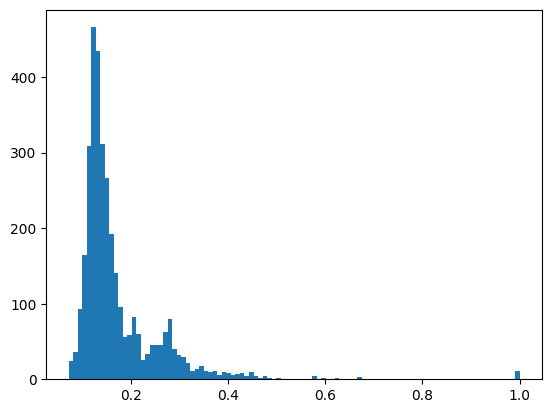

In [27]:
plt.hist(max_tanimoto_values, bins=100)

In [28]:
def check_boundary(tanimoto_values: pd.Series) -> list():
    upper_bound = list()
    lower_bound = list()
    for value_id in range(0, len(tanimoto_values)):
        if tanimoto_values[value_id] >= 0.5:
            upper_bound.append(value_id)
        elif tanimoto_values[value_id] < 0.5:
            lower_bound.append(value_id)
    return [upper_bound, lower_bound]

In [29]:
boundaries = check_boundary(max_tanimoto_values)

In [30]:
data_cnr2.iloc[boundaries[0]]

,id,smiles,value_type,value,units
6,CHEMBL559612,CCCCCCC(C)(C)c1ccc([C@@H]2C[C@H](O)CC[C@H]2CCC...,EC50,11.0000,nM
22,CHEMBL2381801,Cc1c(C(=O)c2ccc3ccccc3c2)c2cccc3c2n1[C@H](CN1C...,Ki,4.5600,nM
35,CHEMBL188,Cc1c(C(=O)c2cccc3ccccc23)c2cccc3c2n1[C@H](CN1C...,Ki,2.1000,nM
36,CHEMBL1835216,CC(C)CN1C(=O)CN(Cc2ccc(-c3ccc(F)c(CN4CCOCC4)n3...,EC50,7.9430,nM
176,CHEMBL1835131,CC(C)CN1C(=O)CN(Cc2ccc(-c3ccc(F)c(CN4CCCCC4)n3...,EC50,2.5120,nM
202,CHEMBL57840,CCCCCCC(C)(C)c1cc(O)c([C@@H]2C=C(C)C3C[C@H]2C3...,Ki,41.2000,nM
422,CHEMBL4175548,O=C(NC1(C(F)(F)F)CC1)c1nn(-c2c[n+]([O-])ccn2)c...,EC50,5.9000,nM
559,CHEMBL2179724,CCCCCCC(C)(C)c1cc(OC)c([C@H]2C=C(CO)[C@H]3C[C@...,Ki,11.2000,nM
588,CHEMBL497392,CCCCCCC(C)(C)c1cc(OC)c([C@H]2C=C(CO)[C@@H]3C[C...,Ki,22.7000,nM
602,CHEMBL1835135,O=C1CN(Cc2ccc(-c3ccc(F)c(CN4CCCCC4)n3)cc2)C(=O...,EC50,2.5120,nM


In [32]:
max_tanimoto_columns.iloc[boundaries[0]].unique()

array(['8GUR', '6PT0', '8GUT', '8GUS', '8GUQ', '6KPF', '5ZTY'],
      dtype=object)

In [36]:
len(data_cnr2['id'].iloc[boundaries[1]])

3400

In [35]:
len(data_cnr2['id'].iloc[boundaries[0]])

43

In [37]:
def sort_smiles_by_receptor(experiment_file_name: str, 
                            reference_receptors: list, 
                            id_column: pd.Series,
                            boundary_values: list,
                            smiles_data: pd.Series, 
                            tanimoto_receptors: pd.Series,
                            high_resolution_receptor_id: str):
    chembl_file = f'{experiment_file_name}.smi'
    for i in reference_receptors:
        os.makedirs(i, exist_ok=True)
        file_path = os.path.join(i, chembl_file) 
        with open(file_path, 'w') as f:
            f.write("") 
    tanimoto_receptors_upper = max_tanimoto_columns.iloc[boundary_values[0]]
    for chembl_id, smiles, receptor_id in zip(id_column.iloc[boundary_values[0]], smiles_data.iloc[boundary_values[0]], tanimoto_receptors_upper):
            with open(f'{receptor_id}/{chembl_file}', "a") as f_out:
                f_out.write(f'{smiles}\t{chembl_id}\t{receptor_id}\n')
                
    tanimoto_receptors_lower = max_tanimoto_columns.iloc[boundary_values[1]]
    for chembl_id, smiles, receptor_id in zip(id_column.iloc[boundary_values[1]], smiles_data.iloc[boundary_values[1]], tanimoto_receptors_lower):
            with open(f'{high_resolution_receptor_id}/{chembl_file}', "a") as f_out:
                f_out.write(f'{smiles}\t{chembl_id}\t{receptor_id}\n')

In [38]:
sort_smiles_by_receptor("experiment_cnr2", reference_receptors_cnr2, 
                        data_cnr2['id'], boundaries, 
                        data_cnr2['smiles'], max_tanimoto_columns, "5ZTY")

In [ ]:
#CNR1

In [39]:
reference_mols_cnr1 = [
    'CC1=C(N(N=C1C(=O)NN2CCCCC2)C3=C(C=C(C=C3)Cl)Cl)C4=CC=C(C=C4)C#CCCO[N+](=O)[O-]',
    'C[C@@H]([C@@H](CC1=CC=C(C=C1)Cl)C2=CC=CC(=C2)C#N)NC(=O)C(C)(C)OC3=NC=C(C=C3)C(F)(F)F',
    'CC1([C@@H]2CC[C@H](C[C@H]2C3=C(C=C(C=C3O1)C(C)(C)CCCCCCN=C=S)O)CO)C',
    'CC1=CC[C@@H]2[C@@H](C1)C3=C(C=C(C=C3OC2(C)C)C(C)(C)CCCCCCBr)O',
    'CCC1=C(NC2=C1C=C(C=C2)Cl)C(=O)NCCC3=CC=C(C=C3)N4CCCCC4',
    'CCCCCCC(C)(C)C1=CC(=C(C=C1)[C@@H]2C[C@@H](CC[C@H]2CCCO)O)O',
    'CC(C)(C)[C@@H](C(=O)OC)NC(=O)C1=NN(C2=CC=CC=C21)CC3=CC=C(C=C3)F',
    'CC1([C@@H]2CC[C@H](C[C@H]2C3=C(C=C(C=C3O1)C(C)(C)CCCCCCN=C=S)O)CO)C',
    'CCCCC/C=C\[C@H](C)/C=C\C/C=C\C/C=C\CCCC(=O)N[C@H](C)CO'
]
reference_receptors_cnr1 = ['5TGZ', '5U09', '5XR8', '5XRA', '6KQI', '7FEE', '6N4B', '6KPG', '8GHV']

In [42]:
data_cnr1 = pd.read_csv("chembl218_final.csv")
data_cnr1 = data_cnr1.iloc[::, 1::]

In [43]:
data_cnr1.describe()

,value
count,2378.000000
mean,24.287766
std,27.342611
min,-0.190000
25%,3.400000
50%,12.590000
75%,37.000000
max,100.000000


In [6]:
# min_ki_idx = data_cnr1['ki'].idxmin()
# max_ki_idx = data_cnr1['ki'].idxmax()
# min_max_idx = [min_ki_idx, max_ki_idx]
# remaining_idx = data_cnr1.index.difference(min_max_idx)
# random.seed(42)
# random_rows=random.sample(range(1, 4103), 498) 
# rows = list(min_max_idx) + list(random_rows)
# rows_set = {*rows}
# len(rows_set)
# data_cnr1 = data_cnr1.iloc[rows]

In [44]:
data = calculate_tanimoto_similarity(data_cnr1['smiles'].tolist(), reference_mols_cnr1, reference_receptors_cnr1)

In [45]:
max_tanimoto_values = data.iloc[:, 0:].max(axis=1)
max_tanimoto_columns = data.iloc[:, 0:].idxmax(axis=1)

(array([  1.,   2.,  33.,  48., 101., 130., 157., 211., 208., 227., 168.,
        124., 111.,  86.,  43.,  65.,  45.,  32.,  17.,  19.,  16.,  18.,
         24.,  20.,  23.,  23.,  17.,   5.,   8.,  11.,  15.,   8.,  12.,
         11.,  15.,  17.,  17.,  15.,  14.,  14.,  19.,  29.,  23.,  23.,
         11.,   8.,   8.,   8.,   9.,   6.,   3.,   5.,  12.,   8.,   8.,
          5.,   9.,   4.,   1.,   1.,   1.,   4.,   5.,   1.,   2.,   1.,
          4.,   1.,   2.,   2.,   1.,   1.,   3.,   0.,   1.,   2.,   2.,
          1.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          7.]),
 array([0.07  , 0.0793, 0.0886, 0.0979, 0.1072, 0.1165, 0.1258, 0.1351,
        0.1444, 0.1537, 0.163 , 0.1723, 0.1816, 0.1909, 0.2002, 0.2095,
        0.2188, 0.2281, 0.2374, 0.2467, 0.256 , 0.2653, 0.2746, 0.2839,
        0.2932, 0.3025, 0.3118, 0.3211, 0.3304, 0.3397, 0.349 , 0.3583,
        0.3676, 0.3769, 0.3862

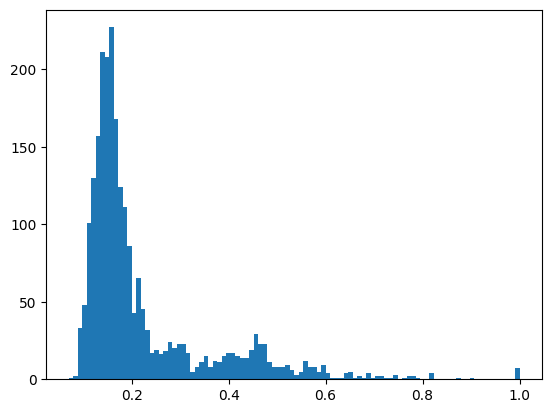

In [48]:
plt.hist(max_tanimoto_values, bins=100)

In [49]:
boundaries = check_boundary(max_tanimoto_values)

In [50]:
len(boundaries[0])

134

In [51]:
max_tanimoto_columns.iloc[boundaries[0]].unique()

array(['5XRA', '5TGZ', '7FEE', '5U09', '6KQI', '5XR8', '8GHV', '6N4B'],
      dtype=object)

In [52]:
sort_smiles_by_receptor("experiment_cnr1", reference_receptors_cnr1, 
                        data_cnr1['id'], boundaries, 
                        data_cnr1['smiles'], max_tanimoto_columns, "5U09")